## Imporing Important Packages

In [1]:
import sys
import os
# Add Scripts folder to Python path
sys.path.append(os.path.abspath("../Scripts"))
# Import DataLoader class
from data_load import DataLoader
from preprocessing import Preprocessing

## Initialize Classes

In [2]:
# Initialize DataLoader
loader = DataLoader()

## Loading Data

In [13]:
# Load data
df = loader.load_csv("BrentOilPrices.csv")  # Replace with your file name

## Previewing Sample Data

In [14]:
# Display Data
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [15]:
preprocessing = Preprocessing(df)

In [16]:
df = preprocessing.preprocess_data()

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_10\Scripts\preprocessing.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['Date'] = pd.to_datetime(self.data['Date'], errors='coerce')


Data preprocessing completed.


In [17]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


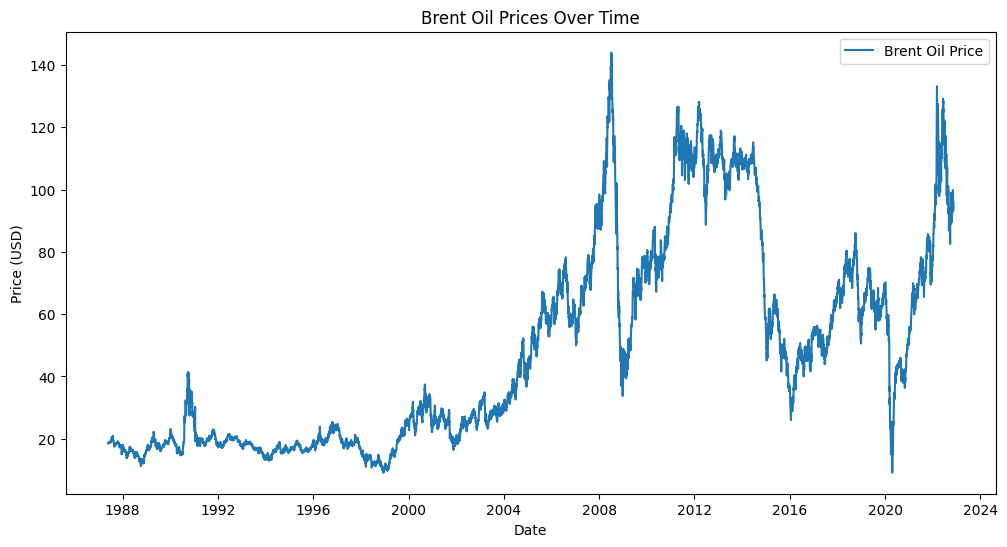

In [18]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices Over Time')
plt.legend()
plt.show()


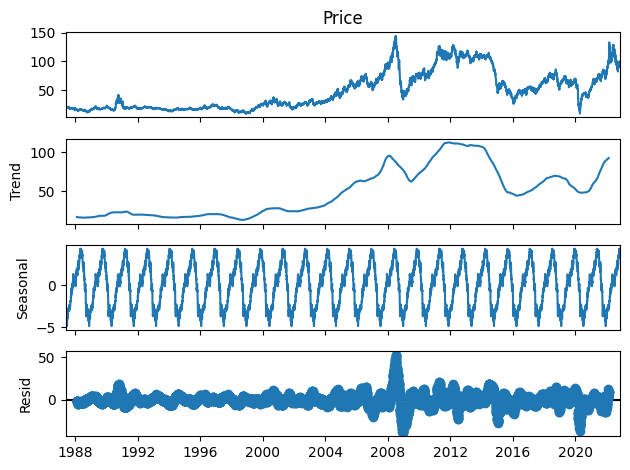

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as Index
df.set_index('Date', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(df['Price'], model='additive', period=365)

# Plot decomposition results
decomposition.plot()
plt.show()


In [21]:
# pip install statsmodels

In [23]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['Price'])

# Print results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary. Differencing is required.")


ADF Statistic: -1.993856011392466
p-value: 0.2892735048934034
The time series is non-stationary. Differencing is required.


In [24]:
df['Price_diff'] = df['Price'].diff().dropna()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (order values need tuning)
model = ARIMA(df['Price'], order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)
print(forecast)


c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


9011    93.497255
9012    93.529037
9013    93.518146
9014    93.521878
9015    93.520599
9016    93.521037
9017    93.520887
9018    93.520939
9019    93.520921
9020    93.520927
9021    93.520925
9022    93.520926
9023    93.520926
9024    93.520926
9025    93.520926
9026    93.520926
9027    93.520926
9028    93.520926
9029    93.520926
9030    93.520926
9031    93.520926
9032    93.520926
9033    93.520926
9034    93.520926
9035    93.520926
9036    93.520926
9037    93.520926
9038    93.520926
9039    93.520926
9040    93.520926
Name: predicted_mean, dtype: float64


c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
# Fit ARIMA model (order values need tuning)
model = ARIMA(df['Price_diff'], order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)
print(forecast)

c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


9011   -0.062174
9012    0.006920
9013    0.008677
9014    0.008722
9015    0.008723
9016    0.008723
9017    0.008723
9018    0.008723
9019    0.008723
9020    0.008723
9021    0.008723
9022    0.008723
9023    0.008723
9024    0.008723
9025    0.008723
9026    0.008723
9027    0.008723
9028    0.008723
9029    0.008723
9030    0.008723
9031    0.008723
9032    0.008723
9033    0.008723
9034    0.008723
9035    0.008723
9036    0.008723
9037    0.008723
9038    0.008723
9039    0.008723
9040    0.008723
Name: predicted_mean, dtype: float64


c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


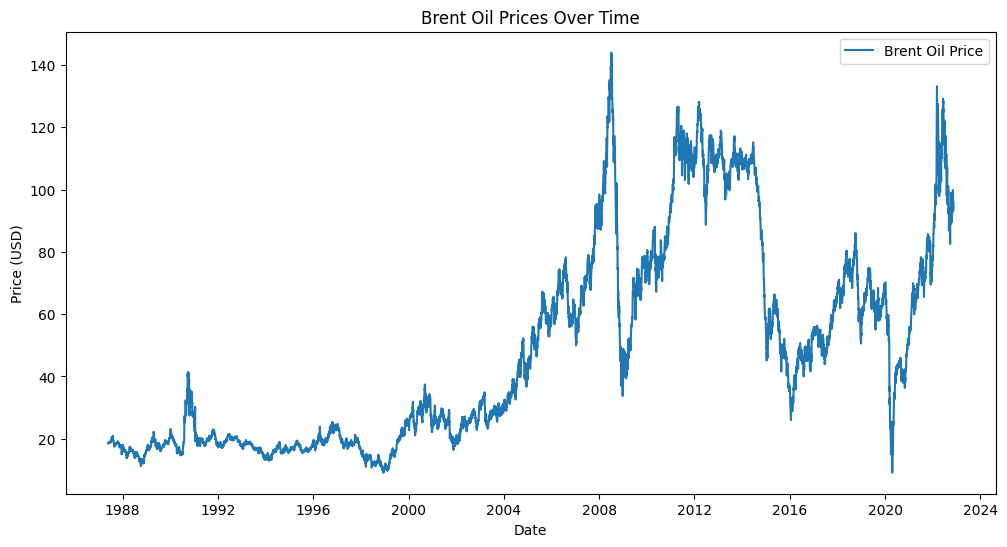

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Brent Oil Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Brent Oil Prices Over Time")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.api import VAR

# Select relevant columns
var_data = df[['Price', 'GDP', 'Inflation', 'Unemployment', 'ExchangeRate']].dropna()

# Fit VAR model
model = VAR(var_data)
model_fitted = model.fit(maxlags=5)

# Forecast
forecast = model_fitted.forecast(var_data.values[-5:], steps=30)
print(forecast)


c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: Only gave one variable to VAR

In [33]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fit Markov-Switching ARIMA
ms_model = MarkovRegression(df["Price"], k_regimes=2, trend="c", switching_variance=True)
ms_model_fitted = ms_model.fit()

# Predict regime
regime_prob = ms_model_fitted.smoothed_marginal_probabilities
print(regime_prob.tail())


c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       0    1
Date                         
2022-11-08  2.434667e-54  1.0
2022-11-09  1.072960e-49  1.0
2022-11-10  3.879127e-51  1.0
2022-11-11  9.675994e-54  1.0
2022-11-14  1.859487e-47  1.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data
X = np.array(df["Price"].values[:-1])
y = np.array(df["Price"].values[1:])

X = X.reshape((X.shape[0], 1, 1))  # Reshape for LSTM

# Define LSTM model
model = Sequential([
    LSTM(50, activation="relu", input_shape=(1,1)),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

# Train model
model.fit(X, y, epochs=50, verbose=0)

# Predict
forecast_lstm = model.predict(X[-30:])
print(forecast_lstm)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R-squared: {r2:.2f}")

# Evaluate ARIMA, VAR, and LSTM
evaluate_model(processed_data["Price"].values[1:], forecast, "VAR")
evaluate_model(processed_data["Price"].values[-30:], forecast_lstm.flatten(), "LSTM")
